In [3]:
import numpy as np
import pandas as pd
import cv2

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

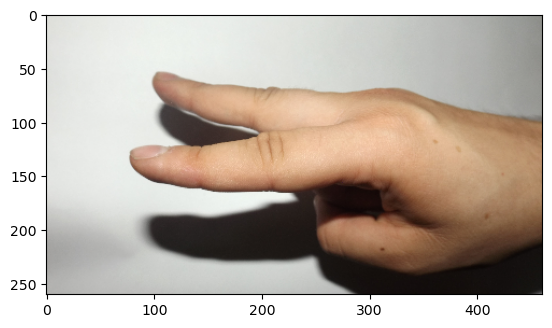

In [4]:
def plt_t(title, img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.show()
    
    
nemo = cv2.imread(r'dataset\men\2\2_men (12).JPG') #read in BGR format
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
nemo = cv2.resize(nemo, (461, 260))
plt.imshow(nemo)
plt.show()

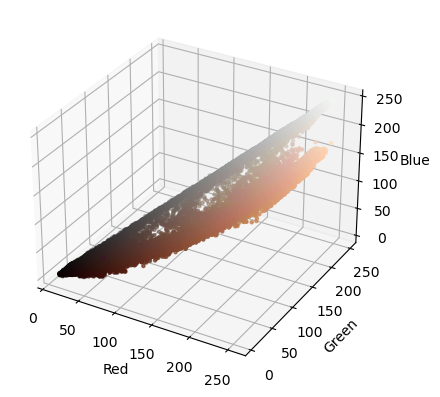

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

(256, 1)


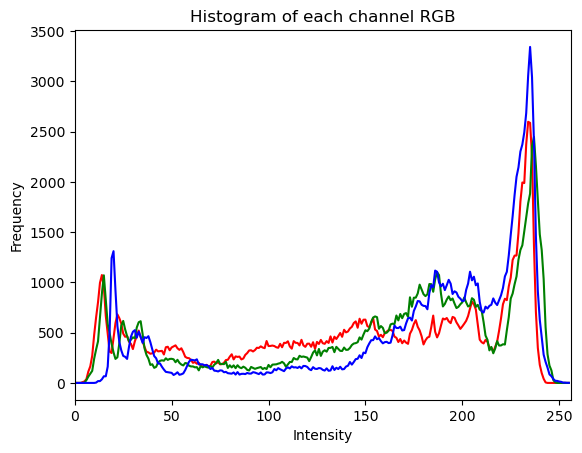

(256, 1)


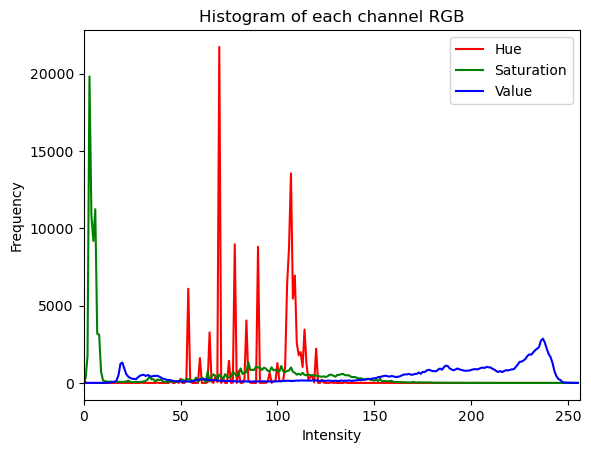

In [6]:
# draw histogram of each channel in the image
color = ('b','g','r')
import cv2
import matplotlib.pyplot as plt

# Read the image
img2 = nemo
img2 = cv2.resize(img2, (461, 260))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# Split the image into its R, G and B channels
r, g, b = cv2.split(img2)

# Calculate the histogram of each channel using cv2.calcHist
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
print(hist_r.shape)
# Plot the histograms using matplotlib.pyplot
plt.figure()
plt.title('Histogram of each channel RGB')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.plot(hist_r, color='r')
plt.plot(hist_g, color='g')
plt.plot(hist_b, color='b')
plt.xlim([0, 256])
plt.show()


# NOW with HSV color space
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(img2)
# Calculate the histogram of each channel using cv2.calcHist
hist_r = cv2.calcHist([h], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([s], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([v], [0], None, [256], [0, 256])
print(hist_r.shape)
# Plot the histograms using matplotlib.pyplot
plt.figure()
plt.title('Histogram of each channel RGB')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.plot(hist_r, color='r',label='Hue')
plt.plot(hist_g, color='g',label='Saturation')
plt.plot(hist_b, color='b', label='Value')
plt.xlim([0, 256])
plt.legend()
plt.show()

# draw each channel in the image
import cv2
import matplotlib.pyplot as plt


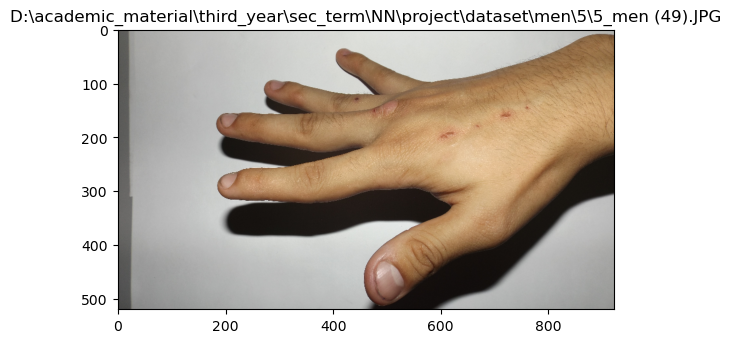

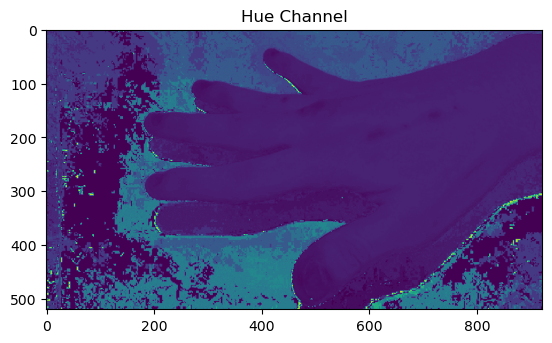

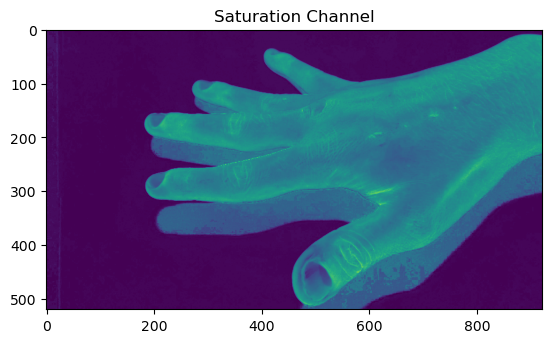

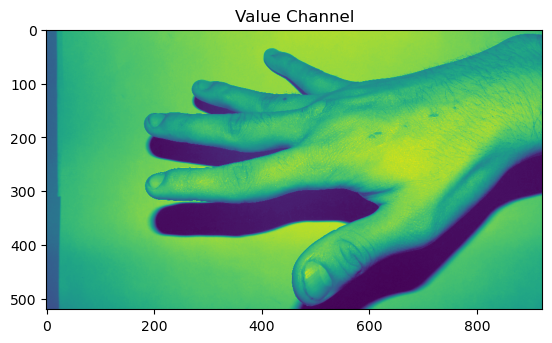

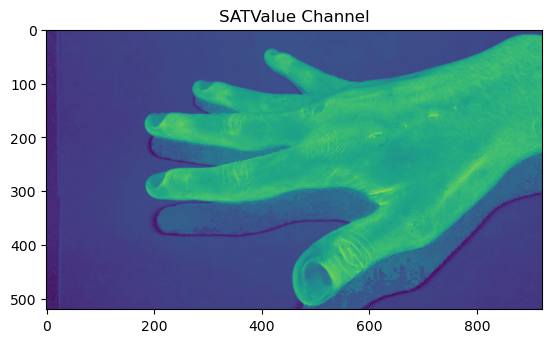

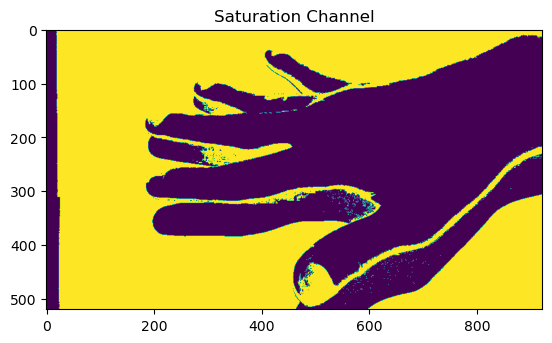

In [31]:
import cv2
import numpy as np

# Read in image
path = r'dataset\men\2\2_men (167).JPG'
path2 = r'dataset\men\2\2_men (130).JPG'

name = path2
def try_HSV(name):
    img = cv2.imread(name)
    img = cv2.resize(img, (461*2, 2*260))

    # Convert BGR to HSV color space
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Split HSV image into separate channels
    h, s, v = cv2.split(hsv_img)

    # Create blank images for each channel
    h_channel = np.zeros_like(h)
    s_channel = np.zeros_like(s)
    v_channel = np.zeros_like(v)

    # Loop through each pixel of the image and assign the corresponding Hue, Saturation, and Value values to the corresponding pixel in each channel
    for i in range(hsv_img.shape[0]):
        for j in range(hsv_img.shape[1]):
            h_channel[i, j] = h[i, j]
            s_channel[i, j] = s[i, j]
            v_channel[i, j] = v[i, j]

    # Display the individual channels
    plt_t(name,  cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt_t('Hue Channel', h_channel)
    plt_t('Saturation Channel', s_channel)
    plt_t('Value Channel', v_channel)
    plt_t('SATValue Channel', 0.3* v_channel + s_channel)


    # tresholding on the saturation channel

    # Convert BGR to HSV color space
    _, trr = cv2.threshold(s_channel + v_channel, 1, 2.0, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt_t('Saturation Channel', trr)
path3 = r'dataset\Women\5\5_woman (132).JPG' 
path4 = r"dataset\men\2\2_men (30).JPG"
p5 = r"D:\academic_material\third_year\sec_term\NN\project\dataset\men\5\5_men (49).JPG"
try_HSV(p5)

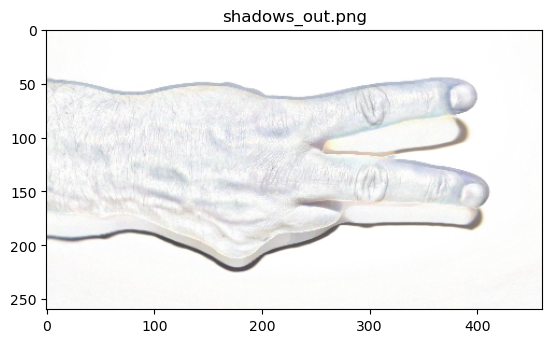

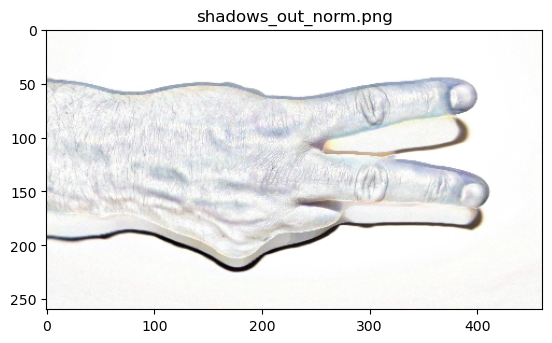

In [22]:
import cv2
import numpy as np

img2 = cv2.imread(r'dataset\men\2\2_men (165).JPG', -1)
img2 = cv2.resize(img2, (461, 260))
rgb_planes = cv2.split(img2)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 -cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)
    
result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

plt_t('shadows_out.png', result)
plt_t('shadows_out_norm.png', result_norm)
plt.show()


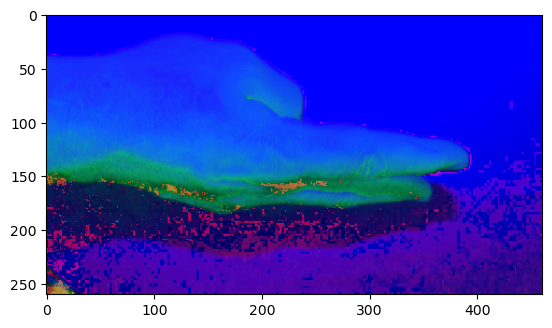

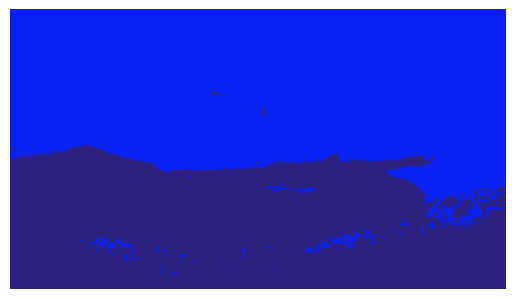

In [9]:
img2 = cv2.imread(r'dataset\men\2\2_men (167).JPG', -1)
img2 = cv2.resize(img2, (461, 260))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
plt.imshow(img2)
plt.show()
twoDimage = img2.reshape((-1,3))
twoDimage = np.float32(twoDimage)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10

ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img2.shape))

plt.axis('off')
plt.imshow(result_image)
plt.show()


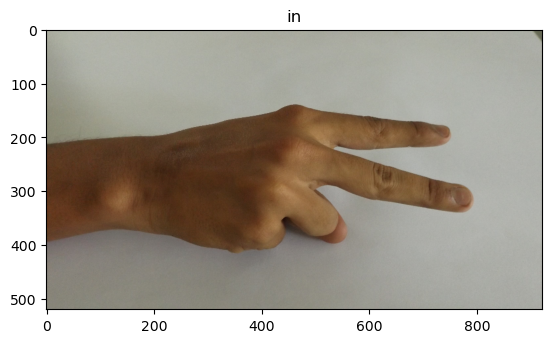

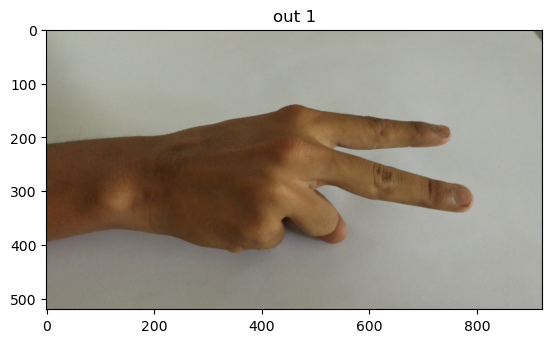

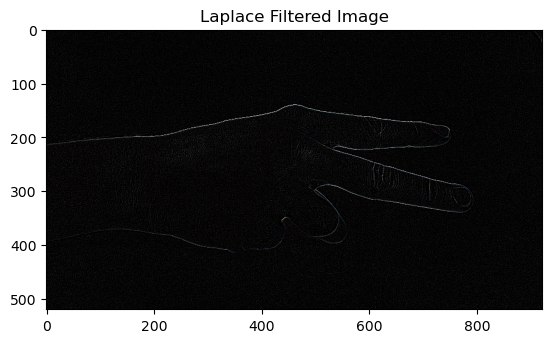

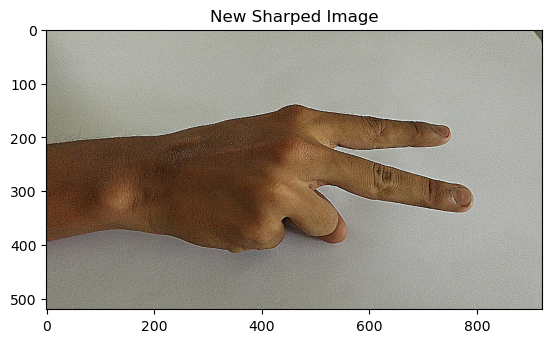

In [10]:
# https://docs.opencv.org/4.x/d2/dbd/tutorial_distance_transform.html
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import random as rng
rng.seed(12345)


path = r'dataset\men\2\2_men (164).JPG'
src = cv.imread(path)
src = cv.resize(src, (461*2, 260*2))
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
# Check if image is loaded fine

# Show source image
plt_t("in",src)
src[np.all(src == 255, axis=2)] = 0
# Show output image
plt_t("out 1",src )



# -------------------------------------------

kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=np.float32)
# do the laplacian filtering as it is
# well, we need to convert everything in something more deeper then CV_8U
# because the kernel has some negative values,
# and we can expect in general to have a Laplacian image with negative values
# BUT a 8bits unsigned int (the one we are working with) can contain values from 0 to 255
# so the possible negative number will be truncated
imgLaplacian = cv.filter2D(src, cv.CV_32F, kernel)
sharp = np.float32(src)
imgResult = sharp - imgLaplacian
# convert back to 8bits gray scale
imgResult = np.clip(imgResult, 0, 255)
imgResult = imgResult.astype('uint8')
imgLaplacian = np.clip(imgLaplacian, 0, 255)
imgLaplacian = np.uint8(imgLaplacian)

plt_t('Laplace Filtered Image', imgLaplacian)
plt_t('New Sharped Image', imgResult)


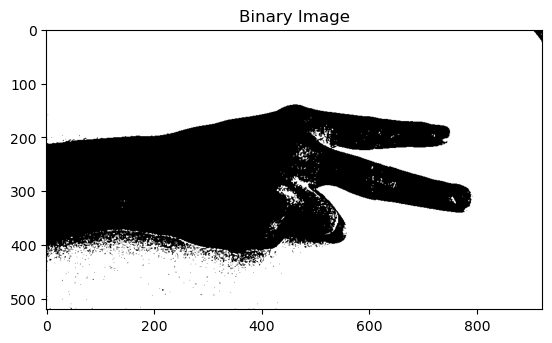

In [11]:
bw = cv.cvtColor(imgResult, cv.COLOR_BGR2GRAY)
_, bw = cv.threshold(bw, 40, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
# median filter
bw = cv.medianBlur(bw, 3)
plt_t('Binary Image', bw, cmap='gray')


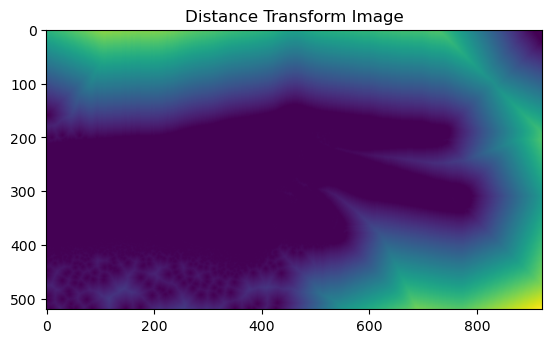

In [12]:
dist = cv.distanceTransform(bw, cv.DIST_L2, 3)
# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it
cv.normalize(dist, dist, 0, 1.0, cv.NORM_MINMAX)
plt_t('Distance Transform Image', dist)


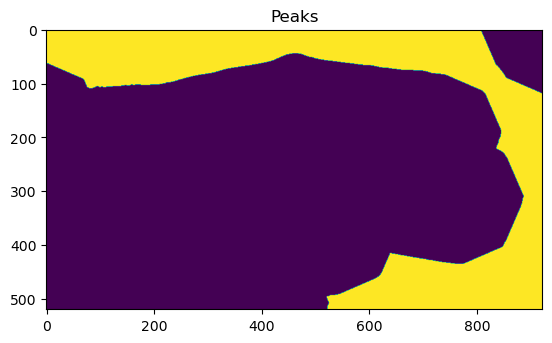

In [13]:
_, dist = cv.threshold(dist, 0.4, 1.0, cv.THRESH_BINARY)
# Dilate a bit the dist image
kernel1 = np.ones((3,3), dtype=np.uint8)
dist = cv.dilate(dist, kernel1)
plt_t('Peaks', dist)


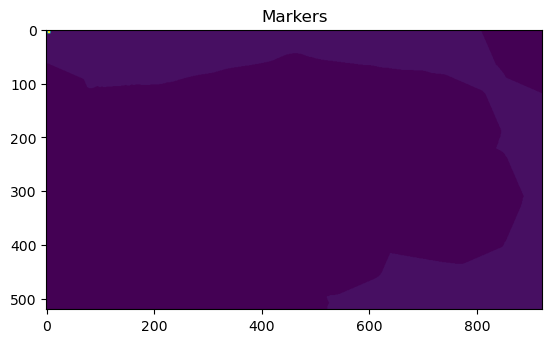

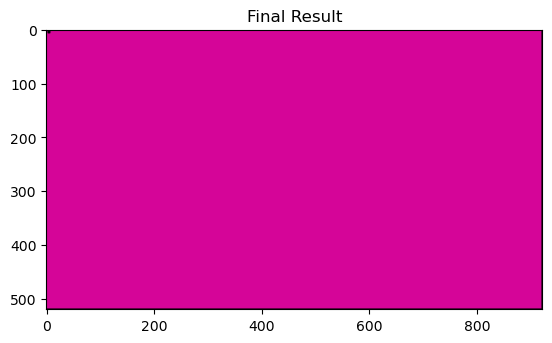

In [14]:
dist_8u = dist.astype('uint8')
# Find total markers
contours, _ = cv.findContours(dist_8u, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# Create the marker image for the watershed algorithm
markers = np.zeros(dist.shape, dtype=np.int32)
# Draw the foreground markers
for i in range(len(contours)):
    cv.drawContours(markers, contours, i, (i+1), -1)
# Draw the background marker
cv.circle(markers, (5,5), 3, (255,255,255), -1)
markers_8u = (markers * 10).astype('uint8')
plt_t('Markers', markers_8u)
cv.watershed(imgResult, markers)
#mark = np.zeros(markers.shape, dtype=np.uint8)
mark = markers.astype('uint8')
mark = cv.bitwise_not(mark)
# uncomment this if you want to see how the mark
# image looks like at that point
#plt_t('Markers_v2', mark)
# Generate random colors
colors = []
for contour in contours:
    colors.append((rng.randint(0,256), rng.randint(0,256), rng.randint(0,256)))
# Create the result image
dst = np.zeros((markers.shape[0], markers.shape[1], 3), dtype=np.uint8)
# Fill labeled objects with random colors
for i in range(markers.shape[0]):
    for j in range(markers.shape[1]):
        index = markers[i,j]
        if index > 0 and index <= len(contours):
            dst[i,j,:] = colors[index-1]
# Visualize the final image
plt_t('Final Result', dst)

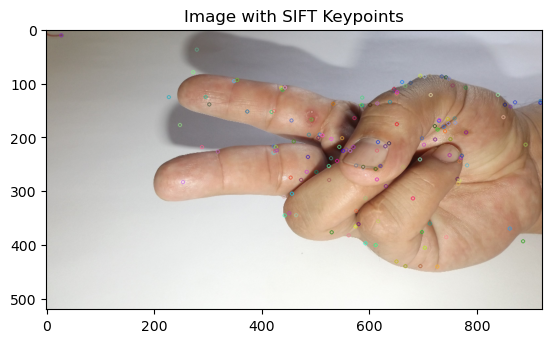

In [23]:
import cv2
import numpy as np

# Read in image
img = cv2.imread(path2)
img = cv2.resize(img, (461*2, 260*2))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
kp, des = sift.detectAndCompute(gray, None)

# Draw keypoints on the original image
img_with_keypoints = cv2.drawKeypoints(img, kp, None)

# Display the image with keypoints
plt_t('Image with SIFT Keypoints', img_with_keypoints)